In [1]:
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor

label = "isSignal"


mpl.rcParams["figure.figsize"] = (6, 4)
mpl.rcParams["figure.dpi"] = 400
mpl.rcParams["axes.titlesize"] = 8
mpl.rcParams["figure.titlesize"] = 8
mpl.rcParams["figure.labelsize"] = 30
mpl.rcParams["text.usetex"] = True
mpl.rcParams["text.latex.preamble"] = r"\usepackage{bm}\usepackage{amsmath}"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["font.size"] = 8
mpl.rcParams["axes.titley"] = None
mpl.rcParams["axes.titlepad"] = 2
mpl.rcParams["legend.fancybox"] = False
mpl.rcParams["legend.framealpha"] = 0
mpl.rcParams["legend.markerscale"] = 1
mpl.rcParams["legend.fontsize"] = 11.5

c:\Users\tetha\miniforge3\envs\autogluon_3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
training_dataset = TabularDataset(pandas.read_parquet("sb_train.parquet"))
training_dataset[label] = training_dataset[label].fillna(value=0)

validation_dataset = TabularDataset(pandas.read_parquet("sr_val.parquet"))
validation_dataset[label] = validation_dataset[label].fillna(value=0)

In [3]:
predictor = TabularPredictor(label=label).fit(training_dataset, time_limit=300, presets="best")

No path specified. Models will be saved in: "AutogluonModels\ag-20250821_025635"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       40.10 GB / 63.10 GB (63.5%)
Disk Space Avail:   973.17 GB / 1862.07 GB (52.3%)
Presets specified: ['best']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identif

(_ray_fit pid=421764) [1000]	valid_set's binary_error: 0.121834
(_ray_fit pid=421764) [2000]	valid_set's binary_error: 0.118771 [repeated 8x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


(_ray_fit pid=422116) 	Ran out of time, early stopping on iteration 2165. Best iteration is:
(_ray_fit pid=422116) 	[2107]	valid_set's binary_error: 0.11757
(_dystack pid=419168) 	0.8805	 = Validation score   (accuracy)
(_dystack pid=419168) 	35.35s	 = Training   runtime
(_dystack pid=419168) 	23.06s	 = Validation runtime
(_dystack pid=419168) Fitting model: LightGBM_BAG_L1 ... Training model for up to 3.18s of the 26.50s of remaining time.
(_dystack pid=419168) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.91%)
(_ray_fit pid=415972) 	Ran out of time, early stopping on iteration 61. Best iteration is: [repeated 8x across cluster]
(_ray_fit pid=415972) 	[61]	valid_set's binary_error: 0.132956 [repeated 8x across cluster]
(_dystack pid=419168) 	0.8673	 = Validation score   (accuracy)
(_dystack pid=419168) 	2.48s	 = Training   runtime
(_dystack pid=419168) 	0.59s	 = Validation runtime
(_dystack pid=419168) F

(_ray_fit pid=421424) [1000]	valid_set's binary_error: 0.116073 [repeated 8x across cluster]


(_ray_fit pid=421424) 	Ran out of time, early stopping on iteration 1527. Best iteration is: [repeated 8x across cluster]
(_ray_fit pid=421424) 	[1393]	valid_set's binary_error: 0.116004 [repeated 8x across cluster]
(_dystack pid=419168) 	0.8805	 = Validation score   (accuracy)
(_dystack pid=419168) 	16.74s	 = Training   runtime
(_dystack pid=419168) 	3.0s	 = Validation runtime
(_dystack pid=419168) Fitting model: WeightedEnsemble_L3 ... Training model for up to 69.93s of the 0.04s of remaining time.
(_dystack pid=419168) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.611, 'LightGBMXT_BAG_L1': 0.389}
(_dystack pid=419168) 	0.8807	 = Validation score   (accuracy)
(_dystack pid=419168) 	0.65s	 = Training   runtime
(_dystack pid=419168) 	0.01s	 = Validation runtime
(_dystack pid=419168) AutoGluon training complete, total runtime = 71.37s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 2155.4 rows/s (57455 batch size)
(_dystack pid=419168) Enabling decision threshold cali

In [4]:
preds_validation_dataset = predictor.predict_proba(validation_dataset.drop(columns=[label]))

In [16]:
preds_signal = preds_validation_dataset[validation_dataset[label] == 1][1]
preds_bkg = preds_validation_dataset[validation_dataset[label] == 0][1]

print(len(preds_signal[preds_signal > 0.5]))
print(len(preds_bkg[preds_bkg > 0.5]))

2233/878

878
2233


2.5432801822323463

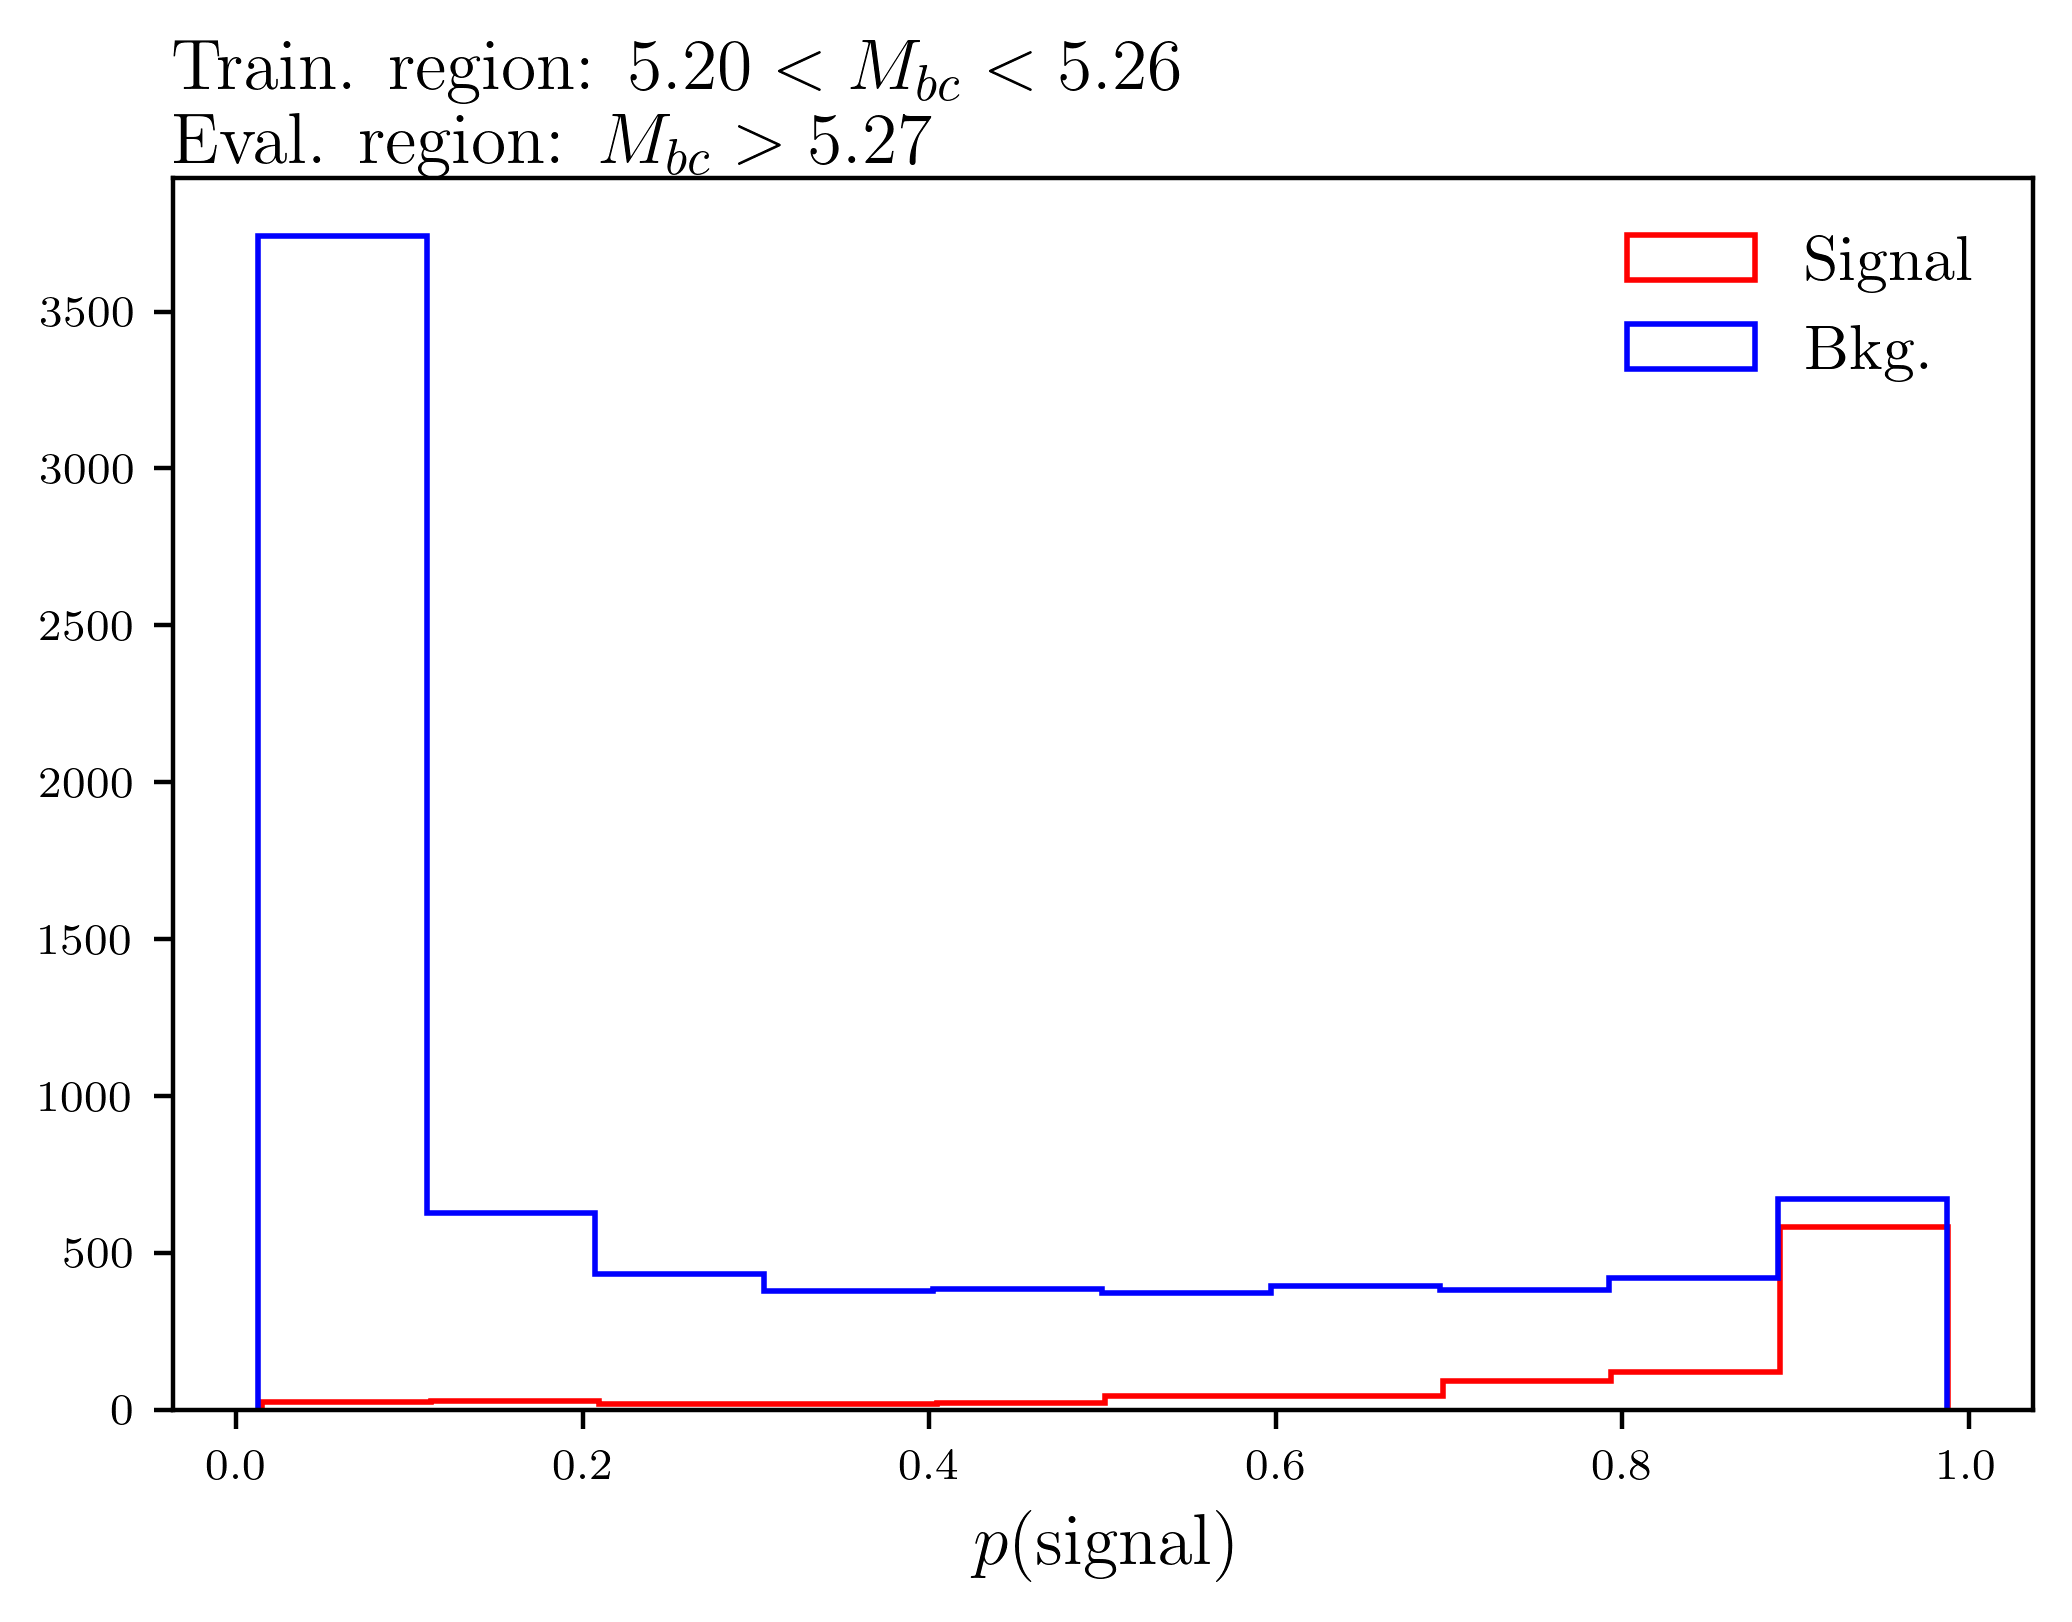

In [8]:

plt.hist(preds_validation_dataset[validation_dataset[label] == 1][1], label="Signal", color="red", linestyle="-", histtype="step")
plt.hist(preds_validation_dataset[validation_dataset[label] == 0][1], label="Bkg.", color="blue", linestyle="-", histtype="step")
plt.title(r"Train. region: $ 5.20 < M_{bc} < 5.26$"+"\n"+ r"Eval. region: $M_{bc} > 5.27$", loc="left", fontsize=13)
plt.xlabel(r"$p(\text{signal})$", fontsize=13)
plt.legend()
plt.savefig("bkg_sup_sb_sr", bbox_inches="tight")

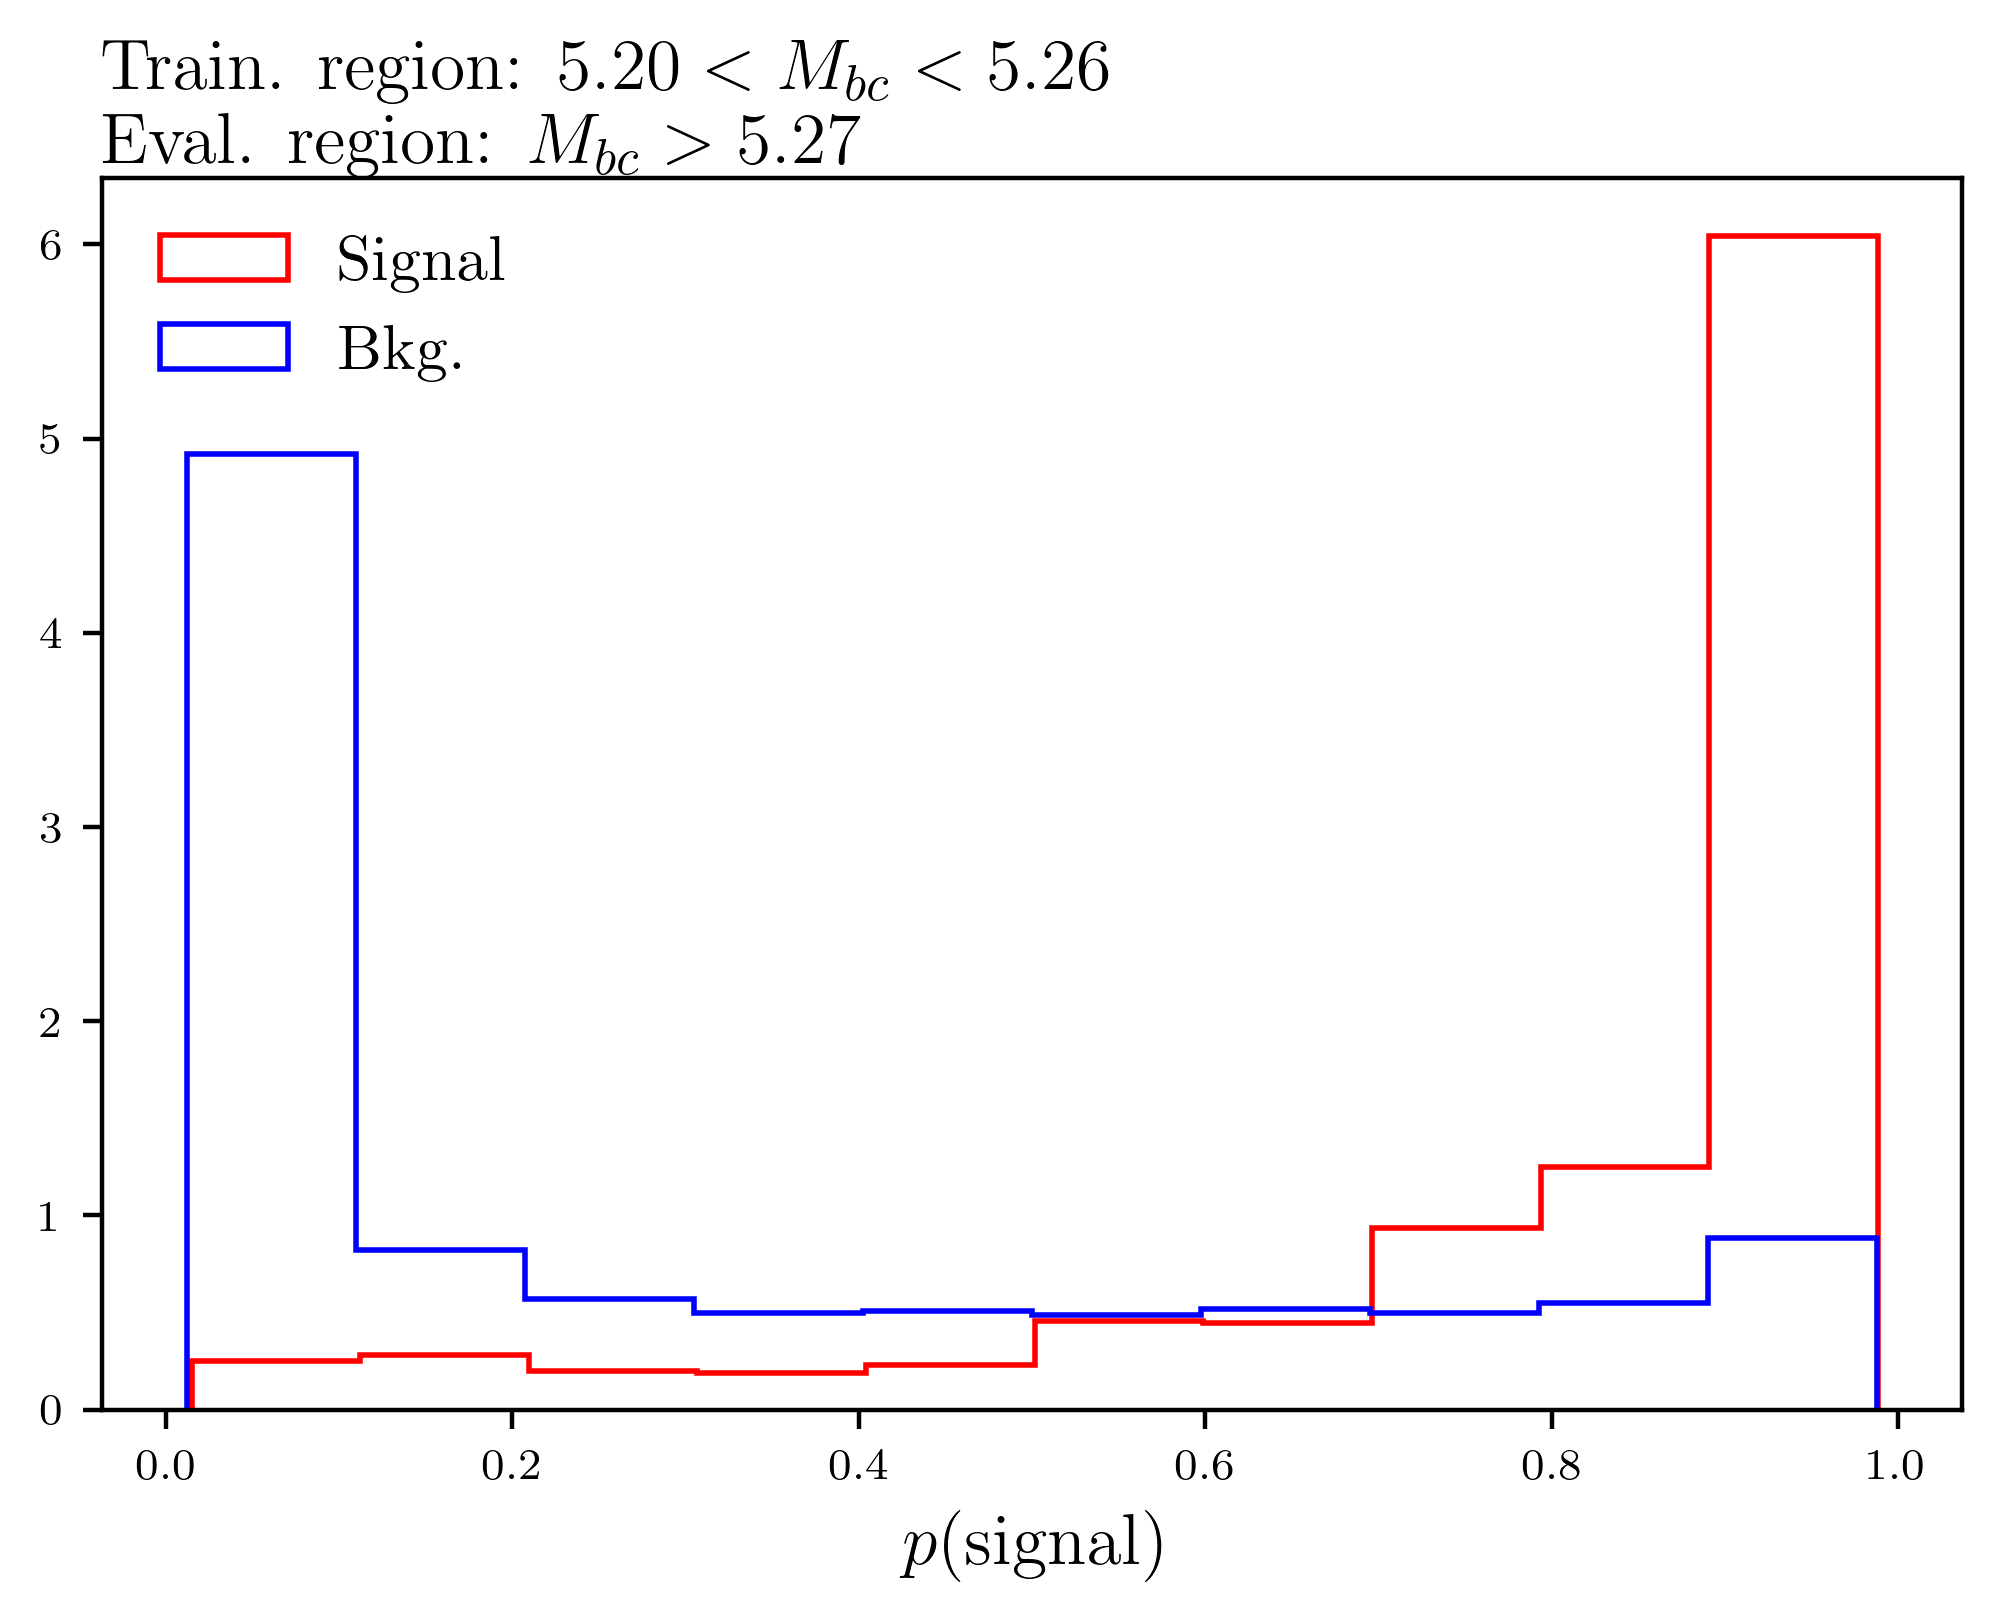

In [7]:

plt.hist(preds_validation_dataset[validation_dataset[label] == 1][1], label="Signal", color="red", linestyle="-", histtype="step", density=True)
plt.hist(preds_validation_dataset[validation_dataset[label] == 0][1], label="Bkg.", color="blue", linestyle="-", histtype="step", density=True)
plt.title(r"Train. region: $ 5.20 < M_{bc} < 5.26$"+"\n"+ r"Eval. region: $M_{bc} > 5.27$", loc="left", fontsize=13)
plt.xlabel(r"$p(\text{signal})$", fontsize=13)
plt.legend()
plt.savefig("bkg_sup_sb_sr_density", bbox_inches="tight")

In [ ]:
preds_training_dataset = predictor.predict_proba(training_dataset.drop(columns=[label]))

In [ ]:
plt.hist(preds_training_dataset[training_dataset[label] == 1][1], label="Signal", color="red", histtype="step")
plt.hist(preds_training_dataset[training_dataset[label] == 0][1], label="Bkg.", color="blue", histtype="step")
# plt.title(r"Train. region: $M_{bc} > 5.27$"+"\n"+ r"Eval. region: $M_{bc} > 5.27$", loc="left")
plt.title(r"Train. region: $ 5.20 < M_{bc} < 5.26$"+"\n"+ r"Eval. region: $5.20 < M_{bc} < 5.26$", loc="left")
plt.xlabel(r"$p(\text{signal})$", fontsize=13)
plt.legend()
plt.savefig("bkg_sup_sb_sb", bbox_inches="tight")

In [ ]:
preds_training_dataset = predictor.predict_proba(training_dataset.drop(columns=[label]))

In [ ]:
plt.hist(preds_training_dataset[training_dataset[label] == 1][1], label="Signal", color="red", histtype="step")
plt.hist(preds_training_dataset[training_dataset[label] == 0][1], label="Bkg.", color="blue", histtype="step")
plt.title(r"Train. region: $M_{bc} > 5.27$"+"\n"+ r"Eval. region: $M_{bc} > 5.27$", loc="left")
plt.xlabel(r"$p(\text{signal})$", fontsize=13)
plt.legend()
plt.savefig("bkg_sup_sr_sr", bbox_inches="tight")

In [ ]:
intervals = {
    "isSignal" : (-1, 2),
    "tfRedChiSqB0" : (-2, 20), 
    "deltaE" : (-0.1, 0.1),
    "invM_K_pi_shifted" : (-0.25, 0.25),
    "K_p_kaonID" : (0.99, 1),
    "K_p_dr" : (0, 0.03),
    "K_p_dz" : (-0.25, 0.25),
    "pi_m_dr" : (0, 0.05),
    "pi_m_dz" : (-0.25, 0.25),
    "mu_p_dr" : (0, 0.03),
    "mu_p_dz" : (-0.25, 0.25),
    "mu_p_muonID" : (0.999, 1),
    "mu_m_dr" : (0, 0.03),
    "mu_m_dz" : (-0.25, 0.25),
    "mu_m_muonID" : (0.999, 1)
}

for var in validation_dataset.columns:

    val_bkg = validation_dataset[validation_dataset[label]==0]
    val_sig = validation_dataset[validation_dataset[label]==1]
    train_bkg = training_dataset[training_dataset[label]==0]
    train_sig = training_dataset[training_dataset[label]==1]

    plt.hist(val_bkg[var], color="purple", linestyle="--", histtype="step", label="val_bkg", density=True, bins=20, range=intervals[var])
    plt.hist(val_sig[var], color="orange", linestyle="--", histtype="step", label="val_sig", density=True, bins=20, range=intervals[var])
    plt.hist(train_bkg[var], color="red", histtype="step", label="train_bkg", density=True, bins=20, range=intervals[var])
    plt.hist(train_sig[var], color="blue", histtype="step", label="train_sig", density=True, bins=20, range=intervals[var])
    plt.legend()
    plt.xlabel(var)
    plt.show()
    plt.close()